# Welcome to the ML-SIG 2019

# 1. Understanding Polynomial Regresison
Suppose you are given some n = 200 data points $(x_{0},y_{0}), (x_{1},y_{1}), ..., (x_{n-1},y_{n-1})$.  
How would you calculate the given function's value at some other point (say $\pi$)?  
<br>
As a first step, you could try to approximate the given function using Polynomials. i.e.  
Find a polynomial f(x) = $a_{0} + a_{1}x + a_{2}x^{2} + ... + a_{n-1}x^{n-1}$ such that  
f($x_{0}$) = $y_{0}$  
f($x_{1}$) = $y_{1}$  
...  
f($x_{n}$) = $y_{n}$  

## Visualization - 1.1: Polynomial regression 
Run the 2 cells below and you can interactively see how we can approximate a given set of data points using polynomials. You are free to chose the degree of the Polynomial and the amount of noise in the Data by adjusting the appropriate sliders.

* func_to_fit: function that needs to approximated.  
  Other functions to try:  
    * y = $\sqrt x$:  ```np.sqrt```
    * y = x:  ```polynomial(0,1)```
    * y = $3-4x+5x^2$:   ```polynomial(3,-4,5)```
* x_range: Range of points on the x-axis
* num_points: Number of Points to consider (max: 200)


In [5]:
# imports - no need to worry about these
%matplotlib notebook
import warnings
import Polynomial_Fit
from Polynomial_Fit import polynomial
import numpy as np
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


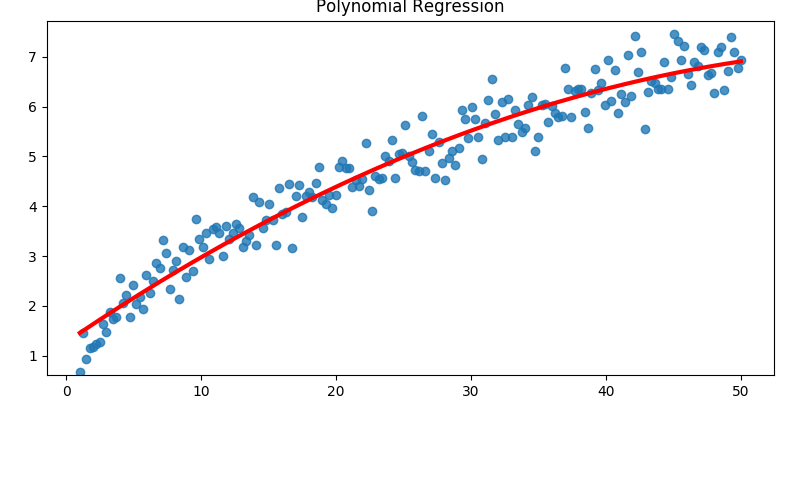

interactive(children=(IntSlider(value=2, description='val', max=30, min=1), Output()), _dom_classes=('widget-i…

interactive(children=(FloatSlider(value=0.3, description='noise', max=1.0, step=0.001), Output()), _dom_classe…

In [6]:
Polynomial_Fit.poly_regression(func_to_fit=np.sqrt, x_range=(1,50))

### So why do we require more complex algorithms when we can always use Polynomial Regression?
* Strong assumptions about the data
* Need to choose the parameters - degree and terms 
* High sensitivity to outliers
* State explosion problem - multivariate polynomial regression
* Computationally expensive - requires the inverse of an nxn matrix

## 2. Clustering Data points (Unsupervised)

### What is clustering?  
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups.

Suppose your are given n points $(x_{0},y_{0})$, $(x_{1},y_{1})$, ..., $(x_{n-1},y_{n-1})$ on a plane, it is probably very easy for you to cluster the given points intuitively.  
But how would you go about writing a program that can cluster any set of points?
This is where clustering algorithms come in to the picture. These algorithms are given the input data and no additional information (that is why they are called *unsupervised*), they can extract some useful structure from the input data.

## Visualization 2.1 - Clustering points
Run the 2 cells below and you can see the DBSCAN clustering algorithm in action.  
Click on the white canvas to add a point,  
the algorithm will continuously cluster all the points on the screen.  
Points belonging to the same cluster will have the same colour.  
DBSCAN (**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise)  finds core samples of high density and expands clusters from them.

<IPython.core.display.Javascript object>


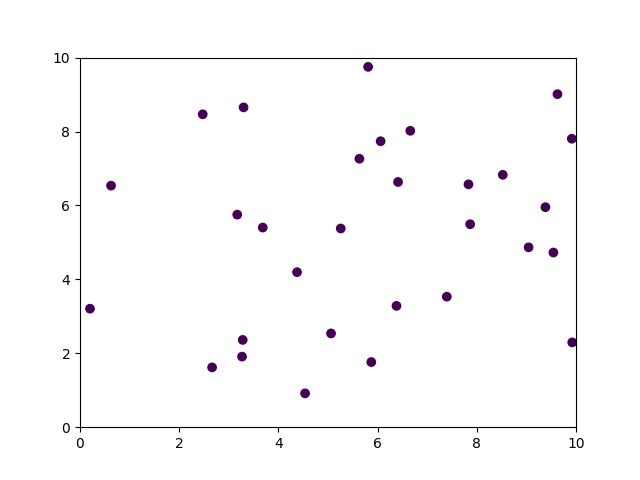

In [7]:
%matplotlib notebook
from Clustering_interactive import cluster_pts
cluster_pts()

## 3. Linear Regression using Gradient Descent

Let us move on to another regression example, but this time we will try to fix some of the problems that we had  earlier. Let us consider the following problem:  
Given n data points $(x_{0},y_{0})$, $(x_{1},y_{1})$, ..., $(x_{n-1},y_{n-1})$ such that  
$y_{i}$ = $mx_{i}$ + c + $\eta$ where $\eta$ ~ N(0,1)  
How would we go about finding m and c ?  
We take an iterative approach. Initially we choose any random $m_{0}$, $c_{0}$ and we measure the error using our model. Namely  
E($m_{0}$, $c_{0}$) = $\sum_{i=0}^{n-1}((m_{0}x_{i}-c_{0})-y_{i})^2$  
We tweak our model's parameters - m,c such that the error E decreases over time. We do so by moving in the direction opposite to the derivative $\frac{\mathrm{d}E}{\mathrm{d}x}$. Our goal is to minimize our error.  
Note that  
$\frac{\partial E(m_{j},c_{j})}{\partial m_{j}}$ = $\sum_{i=0}^{n-1}2x_{i}((m_{j}x_{i}-c_{j})-y_{i})$  
$\frac{\partial E(m_{j},c_{j})}{\partial c_{j}}$ = -$\sum_{i=0}^{n-1}2((m_{j}x_{i}-c_{j})-y_{i})$  
Thus, our update now becomes  
$m_{j+1}$ = $m_{j}$ - $\alpha \frac{\partial E(m_{j},c_{j})}{\partial m_{j}}$  
$c_{j+1}$ = $c_{j}$ - $\alpha \frac{\partial E(m_{j},c_{j})}{\partial c_{j}}$  
where $\alpha$ is a step size called the **learning rate**.  

## Visualization - 3.1: Linear Regression
Run the 2 cells below and you can interactively see how gradient descent in action!  
.  
Choose the target values by setting the m_slope and c_intercept parameters. For example if you would like your target line to be y = $3-5x$, then set:      
m_slope = -5  
c_intercept = 3  
.  
Other values that you can change are:  
* num_pts:  Number of Points to consider (max: 200)  
* learning_rate: The step size parameter $\alpha$ discussed earlier. (In general, a small value for $\alpha$, the step size parameter leads to slower convergence while a very high value leads to NaNs in the parameters. A reasonable range is \[0.0001, 0.001\])


In [10]:
# imports
from gradient_visualization import get_line
import numpy as np
np.seed(42)

AttributeError: module 'numpy' has no attribute 'seed'

<IPython.core.display.Javascript object>


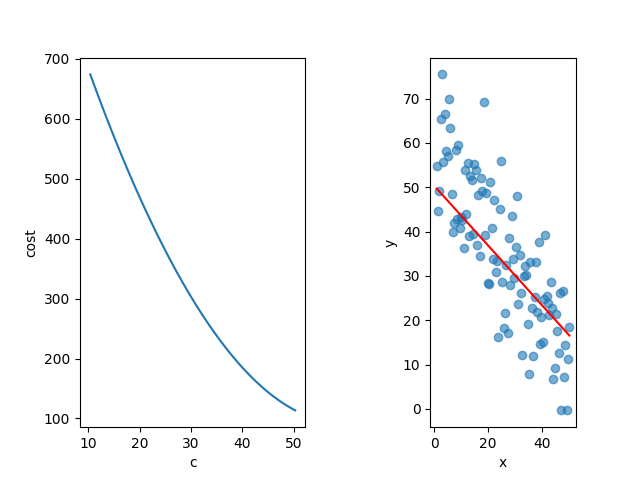

Starting gradient descent at:
 b = 10, m = -5, error = 26798.293223879355
After 5000 iterations:
 b = 50.37052220185987, m = -0.6760490275225676, error = 113.21445633957853


interactive(children=(IntSlider(value=5000, description='iterations', max=5000), Output()), _dom_classes=('wid…

In [11]:
%matplotlib notebook
get_line(
    m_slope=-1,
    c_intercept=60,
    
    initial_m=-5, 
    initial_b=10,
    
    num_pts=100,
    learning_rate=0.0007
)